In [1]:
import matplotlib.pyplot as plt
from numpy import random
import numpy as np

**Exercise 2.5 (programming)**

Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the $q_*(a)$ start out equal and then take independent random walks (say by adding a normally distributed increment with mean 0 and standard deviation 0.01 to all the $q_*(a)$ on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, $\epsilon$ = 0.1. Use $\alpha$ = 0.1 and longer runs, say of 10,000 steps.

In [2]:
EPSILON = 0.1
ALPHA = 0.1
STEPS = int(1e4)

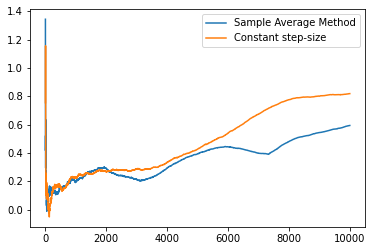

In [5]:
bandit_means = [0] * 10

Q_sa = [0] * 10
N_sa = [0] * 10
total_reward_sa = 0
reward_history_sa = []

Q_exp = [0] * 10
N_exp = [0] * 10
total_reward_exp = 0
reward_history_exp = []

for n in range(STEPS):
    
    # Sample Average Method
    if random.random() < EPSILON:
        action = random.randint(10)
        R = random.normal(bandit_means[action], 1)
    
    else:
        m = max(Q_sa)
        action = [i for i, j in enumerate(Q_sa) if j == m]
        action = random.choice(action)
        R = random.normal(bandit_means[action], 1)
    
    total_reward_sa += R
    reward_history_sa.append(total_reward_sa / (n + 1))
    
    # Update N and Q
    N_sa[action] += 1
    old_Q = Q_sa[action]
    Q_sa[action] += (1 / N_sa[action]) * (R - old_Q)
    
    
    # Constant step size
    if random.random() < EPSILON:
        action = random.randint(10)
        R = random.normal(bandit_means[action], 1)
        
    else:
        m = max(Q_exp)
        action = [i for i, j in enumerate(Q_exp) if j == m]
        action = random.choice(action)
        R = random.normal(bandit_means[action], 1)
    
    N_exp[action] += 1
    old_Q = Q_exp[action]
    Q_exp[action] += ALPHA * (R - old_Q)
    
    total_reward_exp += R
    reward_history_exp.append(total_reward_exp / (n + 1))
    
    # Randomly walk the means
    bandit_means = [x + random.normal(0, 0.01) for x in bandit_means]
    

plt.plot(reward_history_sa, label="Sample Average Method")
plt.plot(reward_history_exp, label="Constant step-size")
plt.legend()

**Exercise 2.11 (programming)** 

Make a figure analogous to Figure 2.6 for the nonstationary case outlined in Exercise 2.5. 
Include the constant-step-size $\epsilon$-greedy algorithm with
$\alpha = 0.1$. Use runs of 200,000 steps and, as a performance measure for each algorithm and
parameter setting, use the average reward over the last 100,000 steps.

In [6]:
STEPS = int(2e5)
ASSESSMENT = int(1e5)
ALPHAS = [2**n for n in range(-7, 0)]
EPSILONS = [2**n for n in range(-7, 0)]
CS = [2**n for n in range(-4, 3)]

In [ ]:
def softmax()

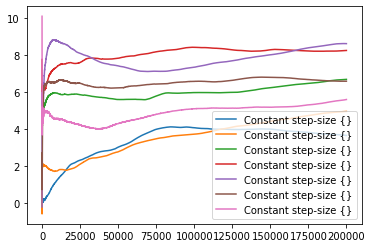

In [7]:
bandit_means = [0] * 10

# Q_sa = [0] * 10
# N_sa = [0] * 10
# total_reward_sa = 0
# reward_history_sa = []
exp_dict = {}
for EPSILON in EPSILONS: 
    Q_exp = [0] * 10
    N_exp = [0] * 10
    total_reward_exp = 0
    reward_history_exp = []

    for n in range(STEPS):

        # Sample Average Method
    #     if random.random() < EPSILON:
    #         action = random.randint(10)
    #         R = random.normal(bandit_means[action], 1)

    #     else:
    #         m = max(Q_sa)
    #         action = [i for i, j in enumerate(Q_sa) if j == m]
    #         action = random.choice(action)
    #         R = random.normal(bandit_means[action], 1)

    #     total_reward_sa += R
    #     reward_history_sa.append(total_reward_sa / (n + 1))

    #     # Update N and Q
    #     N_sa[action] += 1
    #     old_Q = Q_sa[action]
    #     Q_sa[action] += (1 / N_sa[action]) * (R - old_Q)


        # Constant step size
        if random.random() < EPSILON:
            action = random.randint(10)
            R = random.normal(bandit_means[action], 1)

        else:
            m = max(Q_exp)
            action = [i for i, j in enumerate(Q_exp) if j == m]
            action = random.choice(action)
            R = random.normal(bandit_means[action], 1)

        N_exp[action] += 1
        old_Q = Q_exp[action]
        Q_exp[action] += ALPHA * (R - old_Q)

        total_reward_exp += R
        reward_history_exp.append(total_reward_exp / (n + 1))

        # Randomly walk the means
        bandit_means = [x + random.normal(0, 0.01) for x in bandit_means]
    
    exp_dict[EPSILON] = reward_history_exp
    # plt.plot(reward_history_sa, label="Sample Average Method")
    plt.plot(reward_history_exp, label="Constant step-size {}")
    plt.legend()


$A_t = argmax [Q_t(a) + c \sqrt(\text{ln} t / N_t(a))]$

[0.05203466 0.05203466 0.05203466 0.05203466 0.05203466 0.05203466
 0.05203466 0.05203466 0.05203466 0.05203466]
[0.10406933 0.10406933 0.10406933 0.10406933 0.10406933 0.10406933
 0.10406933 0.10406933 0.10406933 0.10406933]
[0.20813865 0.20813865 0.20813865 0.20813865 0.20813865 0.20813865
 0.20813865 0.20813865 0.20813865 0.20813865]
[0.41627731 0.41627731 0.41627731 0.41627731 0.41627731 0.41627731
 0.41627731 0.41627731 0.41627731 0.41627731]
[0.83255461 0.83255461 0.83255461 0.83255461 0.83255461 0.83255461
 0.83255461 0.83255461 0.83255461 0.83255461]
[1.66510922 1.66510922 1.66510922 1.66510922 1.66510922 1.66510922
 1.66510922 1.66510922 1.66510922 1.66510922]
[3.33021844 3.33021844 3.33021844 3.33021844 3.33021844 3.33021844
 3.33021844 3.33021844 3.33021844 3.33021844]


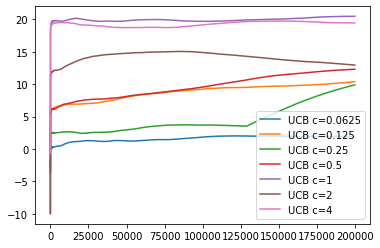

In [8]:
bandit_means = [0] * 10

# Q_sa = [0] * 10
# N_sa = [0] * 10
# total_reward_sa = 0
# reward_history_sa = []
UCB_dict = {}
for C in CS: 
    Q_exp = [0] * 10
    N_exp = [1] * 10
    total_reward_exp = 0
    reward_history_exp = []

    for n in range(1, STEPS):

        brackets = Q_exp + (C * np.sqrt(np.log(n+1) / N_exp))
        if n == 1:
            print(brackets)
        m = max(brackets)
        action = [i for i, j in enumerate(brackets) if j == m]
        action = random.choice(action)
        R = random.normal(bandit_means[action], 1)

        N_exp[action] += 1
        old_Q = Q_exp[action]
        Q_exp[action] += ALPHA * (R - old_Q)

        total_reward_exp += R
        reward_history_exp.append(total_reward_exp / (n + 1))

        # Randomly walk the means
        bandit_means = [x + random.normal(0, 0.01) for x in bandit_means]
    
    UCB_dict[C] = reward_history_exp
    # plt.plot(reward_history_sa, label="Sample Average Method")
    plt.plot(reward_history_exp, label=f"UCB c={C}")
    plt.legend()


# GRADIENT BANDIT

In [104]:
STEPS = 200_000
ALPHAS = [2**n for n in range(-7, 3)]

In [105]:
def softmax(Hs):
    denom = sum([np.exp(b) for b in Hs])
    return [np.exp(a) / denom for a in Hs]

0.0078125
0.015625
0.03125
0.0625
0.125
0.25
0.5
1


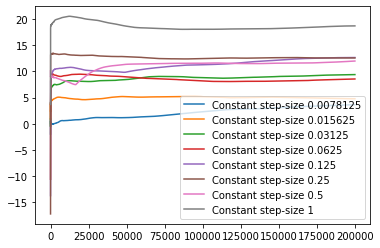

In [106]:
bandit_means = [0] * 10

grad_dict = {}

for ALPHA in ALPHAS[:-2]: 
    print(ALPHA)
    H = [0] * 10
    R_bar = 0
    N_exp = [0] * 10
    total_reward_exp = 0
    reward_history_exp = []

    for n in range(STEPS):
        
        # Softmax Choose Action
        pi = softmax(H)
        action = random.choice(list(range(10)), p=pi)
    
        # Get Reward
        R = random.normal(bandit_means[action], 1)
        
        # Update Preferences
        for A in list(range(10)):
            if A == action:
                H[A] += ALPHA * (R - R_bar) * (1 - pi[action])
            else:
                H[A] -= ALPHA * (R - R_bar) * (pi[action])
        
        
        
        # Update R_Bar
        R_bar += ALPHA * (R - R_bar)

        N_exp[action] += 1
        old_Q = Q_exp[action]
        Q_exp[action] += ALPHA * (R - old_Q)

        total_reward_exp += R
        reward_history_exp.append(total_reward_exp / (n + 1))

        # Randomly walk the means
        bandit_means = [x + random.normal(0, 0.01) for x in bandit_means]

    grad_dict[ALPHA] = reward_history_exp
    # plt.plot(reward_history_sa, label="Sample Average Method")
    plt.plot(reward_history_exp, label=f"Constant step-size {ALPHA}")
    plt.legend()


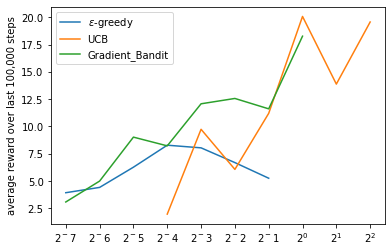

In [122]:
xticks = list(range(-7, 3))
xlabels = [f"$2^{x}$" for x in xticks]

x = []
y = []
for key, value in exp_dict.items():
    x.append(key)
    y.append(np.mean(value[ASSESSMENT:]))

ucb_x = []
ucb_y = []
for key, value in UCB_dict.items():
    ucb_x.append(key)
    ucb_y.append(np.mean(value[ASSESSMENT:]))
    
grad_x = []
grad_y = []
for key, value in grad_dict.items():
    grad_x.append(key)
    grad_y.append(np.mean(value[ASSESSMENT:]))


plt.plot(np.log2(x), y, label="$\epsilon$-greedy")    
plt.plot(np.log2(ucb_x), ucb_y, label="UCB")
plt.plot(np.log2(grad_x), grad_y, label="Gradient_Bandit")    

plt.xticks(xticks, xlabels)
plt.ylabel("average reward over last 100,000 steps")
plt.legend()